## DSCI100 Project - Heart Disease

### Introduction

As heart disease gradually becomes a global leading cause of death, it is critical to make an early prediction for people who may have the risk of developing a heart disease. Therefore, our group wanted to know if age and maximum heart rate can predict the diagnosis of heart disease—the presence or absence of heart disease. We used the given `“processed.cleveland.data”` database from the Heart Disease Data Set to develop a classification model in R to explore the answer of our proposed question. This database contains a total of 14 attributes that could have been used to diagnose heart disease. However, there were only three variables we were interested in: age (`age`), maximum heart rate achieved (`thalach`), and diagnosis of heart disease (`num`).

### Preliminary Exploratory Data Analysis


For this analysis, we chose age and maximum heart rate as our predictor variables. Previous study has shown that although the maximum heart rate can be predicted in accordance with age, the equation only applies to healthy individuals (Han et al., 2022). The actual maximum heart rate of patients with cardiopulmonary diseases is found to be significantly different from the predicted values (Han et al., 2022). Based on this knowledge, we decided that it might be possible to predict the presence or absence of heart disease by seeing if the maximum heart rate of an individual aligns with people at similar age with or without heart disease. Therefore, the columns of age (`age`) and maximum heart rate achieved (`thalach`) in the data frame are used as the predictors for predicting the diagnosis of heart disease (`num`) in our following code to assess this hypothesis.

In [21]:
# Load Packages

library(rvest)
library(tidyverse)
library(repr)
library(tidymodels)
library(stringr)
library(patchwork)
set.seed(1)

Our target variable – `num` – initially had five different values that represented the presence or absence of heart disease from the original dataset. Initially, “0” indicated the absence of heart disease while the values 1-4 indicated the presence of heart disease. To simplify the dataset, we used `mutate()` to rename the diagnosis of heart disease (`num`) column to `diagnosis` for the presence of heart disease and then labelled the values 1-4 as “Positive” for the presence of heart disease and by default, the value 0 as “Negative” for no heart disease. We simplified the dataset so that there were only two possible labels for our target variable, “Positive” and “Negative,” instead of having five different values that represented two labels. We used the `slice()` function to display the first 6 rows. 

*Table 1: Heart Disease Data Set*

In [22]:
# Load Data into R
# Clean and Wrangle Data into a Tidy Format
# Since we are using a processed dataset the data is already in tidy format
heart_disease_download <- download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                                        "heart_disease.csv")
heart_disease_original <- read_delim("heart_disease.csv",
                                      col_names = FALSE)

names(heart_disease_original) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis")

heart_disease <- heart_disease_original |>
                 mutate(diagnosis = ifelse(diagnosis == "1" | diagnosis == "2" | diagnosis == "3" | diagnosis == "4",
                                           "Positive", "Negative")) |>
                 mutate(diagnosis = as_factor(diagnosis))
slice(heart_disease,1:6)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,Negative
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Positive
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Positive
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Negative
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,Negative


In order to create a classification model to answer our predictive question, we used the K-nearest neighbour classification algorithm. Our simplified version of the Heart Disease dataset was split into training and testing sets with `prop = 0.75` to have 75% of the data in our training set and `strata = diagnosis`  to specify our target variable. After splitting the dataset, we created a table that shows the respective counts for “Positive” and “Negative” presence of heart disease. 

In [23]:
# Set the Seed
set.seed(1)
        
# Training and Testing Data Set Split
heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = diagnosis)
heart_disease_training <- training(heart_disease_split)
heart_disease_testing <- testing(heart_disease_split)

In [24]:
# Exploratory Data Analysis (Table)
num_obs <- nrow(heart_disease_training)
heart_disease_exp_table <- heart_disease_training |>
                           group_by(diagnosis) |>
                           summarize(count = n(), percentage = n() / num_obs * 100)

# The table shows the varying levels of heart disease from 0 (which indicates abscence) to 4 (which indicates prescence), and 
# also shows their respective counts


*Table 2: Diagnosis Count*

In [25]:
heart_disease_exp_table

diagnosis,count,percentage
<fct>,<int>,<dbl>
Negative,123,54.18502
Positive,104,45.81498


An important step in our analysis was exploring different variables that we could have possibly used for our classification model. We created a scatter plot using the `geom_point` function and our `heart_disease_training` set to visualise the relationship between our two predictor variables, age and maximum heart rate. The data points were plotted in different colours using `colour = as_factor(diagnosis)` to differentiate between the presence of heart disease, "Negative" and "Positive". Based on Figure 1, it was evident that “Negative” presence of heart disease and maximum heart rate decreases over time as age increases. The scatter plot also showed that “Positive” presence of heart disease increases with increasing age as the "Positive" data points were concentrated towards the older ages above 50 years old rather than younger ages. From this visualisation we were able to further confirm that age and maximum heart rate were suitable predictors to predict the presence and absence of heart disease. 


In [26]:
# Exploratory Data Analysis (Visualization)
heart_disease_exp_plot1 <- heart_disease_training |>
                              ggplot(aes(x = age, y = thalach, colour = as_factor(diagnosis))) +
                              geom_point() +
                              ggtitle("Relation between age and maximum heart rate achieved")+
                              labs(x = "Age", y = "Maximum Heart Rate Achieved", colour = "Presence of Heart Disease")+ 
                              theme(text = element_text(size = 12))


*Figure 1: Relation Between Age and Maximum Heart Rate Achieved*

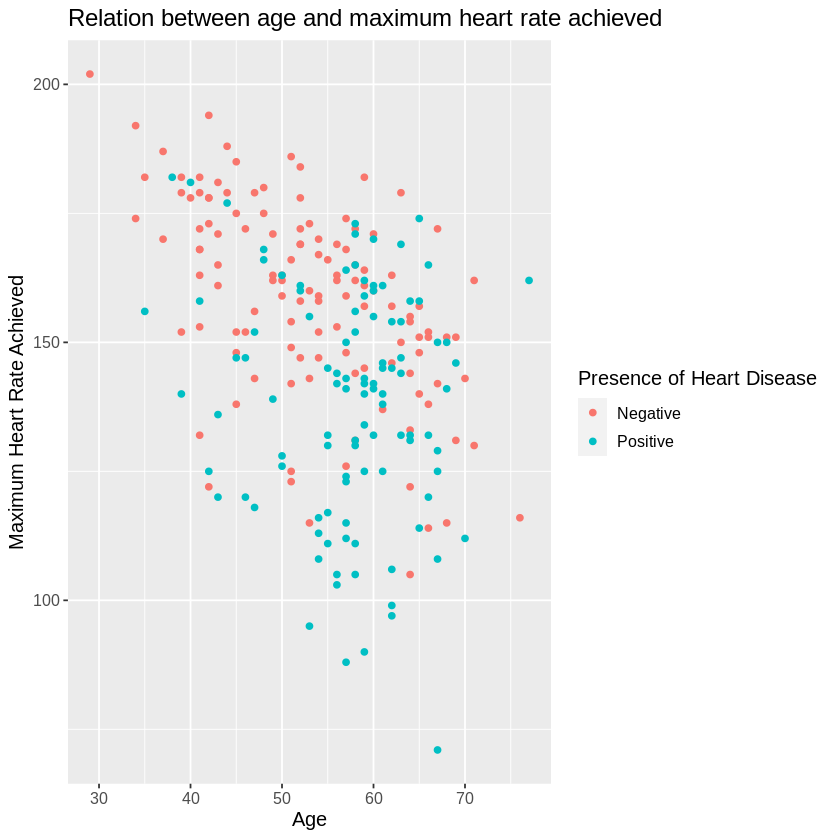

In [27]:
heart_disease_exp_plot1

# This plot shows the relation between Age and the maximum heart rate and each point is colored by the prescence of 
# heart disease

A histogram graph was also created using `geom_histogram` to show the distribution of people’s age in the training set, with a blue vertical dashed-line to indicate the average age using `geom_vline`. The distribution of people’s ages were separated in two different shades of green to differentiate between people who are “Positive” and “Negative”. Visualising the age distribution was important in our project to know the range of ages in our training set used to build our classification model and the ages more likely to have heart disease. Based on Figure 2, we saw that the majority of people above the age of 55 are “Positive” for heart disease as there was a clear difference in the distribution above and below that age. 


In [28]:
heart_disease_exp_plot2 <- heart_disease_training |>
                            ggplot(aes(x = age, fill = diagnosis))+
                            geom_histogram()+
                            ggtitle("Age Distribution")+
                            labs(x = "Age", y = "Count", fill="Diagnosis")+
                            scale_fill_brewer(palette = 'PiYg') +
                            geom_vline(aes(xintercept=mean(age)),
                            color="blue", linetype="dashed", size=1)+
                            theme(legend.position="top")

Warning message in pal_name(palette, type):
“Unknown palette PiYg”


*Figure 2: Age Distribution*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



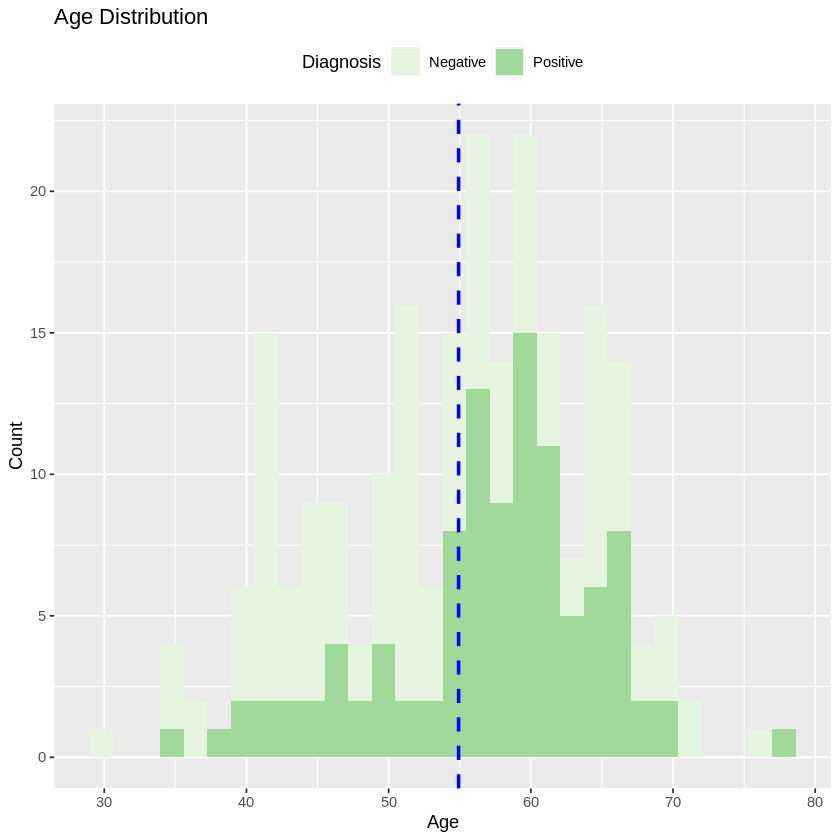

In [30]:
heart_disease_exp_plot2

#This plot shows the distribution of age with the blue dashed line indicating the mean age

In [31]:
heart_disease_exp_plot2d <- ggplot(heart_disease_training, aes(x=age)) + 
                             geom_histogram(aes(y=..density..), colour="black", fill="white")+
                             geom_density(alpha=.2, fill="#FF6666") +
                             ggtitle("Age Distribution with density")+
                             labs(x = "Age", y = "Density", fill="", color = "")

*Figure 3: Age Distribution with Density*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



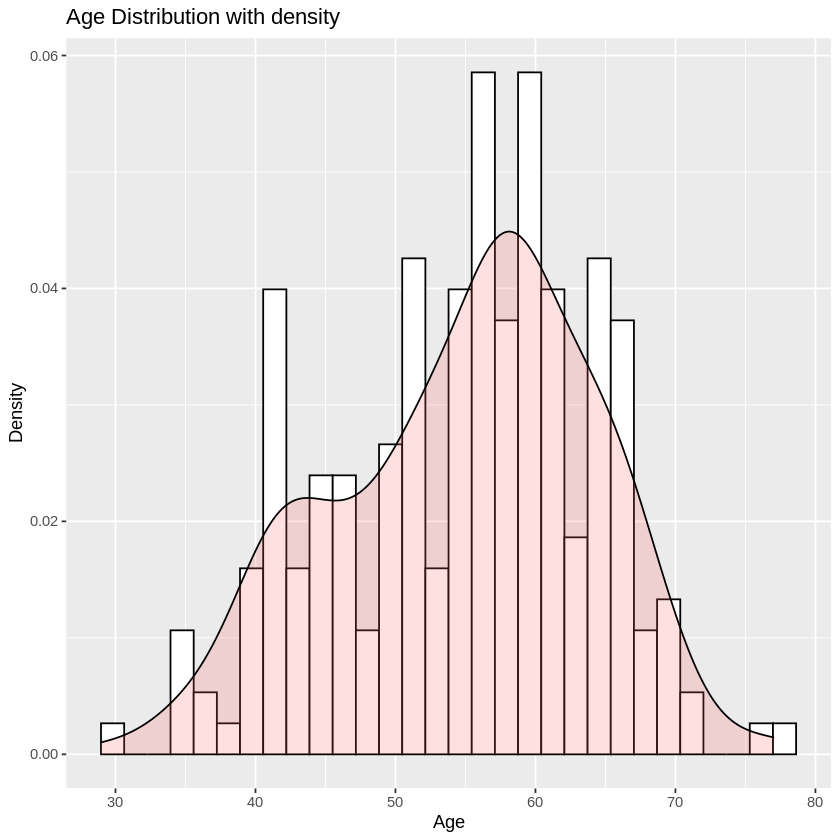

In [33]:
heart_disease_exp_plot2d                                
# This plot shows the distribution of age with a density curve

We wanted to further investigate other possible predictor variables to use in building our classification model. A scatter plot using the `geom_point()` function was created to visualize the relationship between cholesterol levels and maximum heart rate achieved. Based on Figure 4, we saw that the cholesterol levels for people “Positive” and “Negative” were relatively the same and there was no clear relation between cholesterol and max heart rate achieved. As a result, we decided that cholesterol would not be a good predictor variable to use in our classification model. 

*Figure 4: Cholesterol by Maximum Heart Rate Achieved*

In [34]:
cho_thalach
# This plot shows the relation between cholestrol levels and the maximum heart rate and each point 
# is colored by the prescence of heart disease

ERROR: Error in eval(expr, envir, enclos): object 'cho_thalach' not found


Another variable we were interested in using as a predictor variable was resting blood pressure. Based on Figure 5, we saw that the resting blood pressure was relatively the same for people “Positive” or “Negative” as the data points were all clustered towards the left of the graph. There was also no visible relationship between resting blood pressure and max heart rate achieved and as a result, we decided that resting blood pressure would not be a good predictor variable to use in building our classification model.

*Figure 5: Resting Blood Pressure by Maximum Heart Rate Achieved*

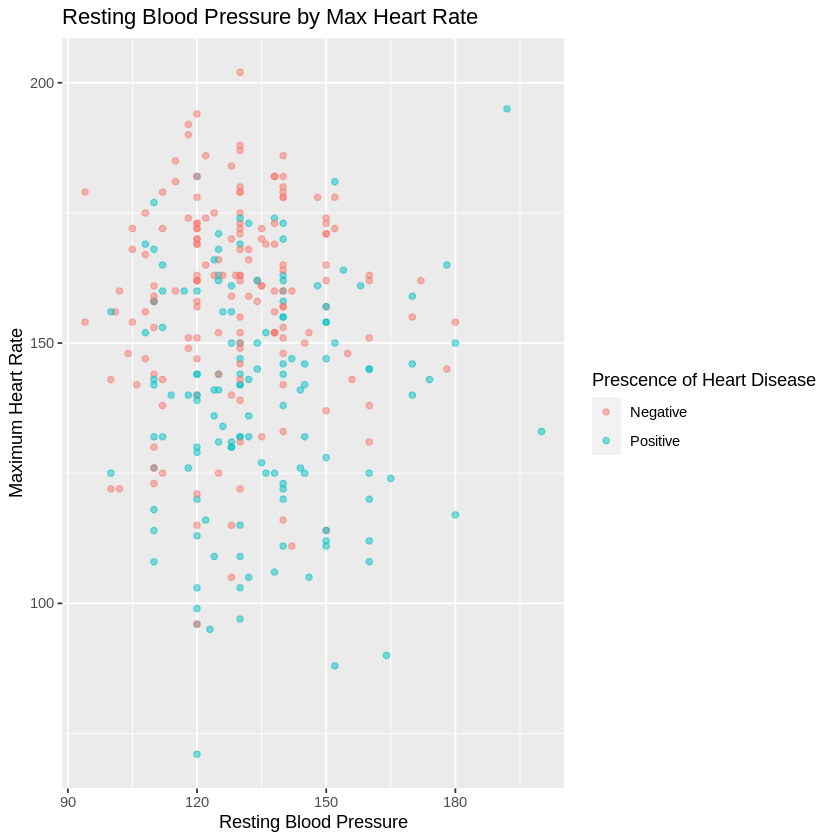

In [38]:
trestbps_thalach
# This plot shows the relation between Resting Blood Pressure and the maximum heart rate and each point 
# is colored by the prescence of heart disease

In [39]:
# Summary Table
summary_table <- heart_disease |> 
               group_by(diagnosis) %>% 
               summarize(mean_age = mean(age, na.rm = TRUE),
                         mean_trestbps = mean(trestbps, na.rm = TRUE))

In [40]:
summary_table

diagnosis,mean_age,mean_trestbps
<fct>,<dbl>,<dbl>
Negative,52.58537,129.2500
Positive,56.62590,134.5683


### Finding Best K Value

We performed cross-validation to help determine the most appropriate K value to create our model with. The training dataset was split into 5 folds using `vfold_cv` and we specified the strata as `diagnosis` to predict “Positive” and “Negative” presence of heart disease. We preprocessed our `heart_disease_training` set using the `recipe()` function and specifying age (`age`) and maximum heart rate achieved (`thalch`) as our predictor variables to predict `diagnosis`. Our classification model was made using K nearest neighbours and setting the mode to "classification" to answer our predictive question. The neighbours argument within the `nearest_neighbour` function was set to `tune()` as the following steps of cross-validation would be used to determine the best K value. The `tibble()` function was used to specify the sequence of K values we wanted to find the best K value from which was specifically K values 1 to 30. We used `workflow()` to combine `heart_disease_recipe` and the classification model made (`knn_tune`). The workflow was fitted onto the cross-validation set made earlier (`heart_disease_cv`) and the K values (`k_vals`) using `tune_grid()`. The metrics of the workflow were collected and filtered for the accuracy of each K value. We then created a line graph using `geom_point` and `geom_line` to plot the accuracy estimate of each K value. Based on Figure 6, we concluded that K = 18 was the most appropriate K value to create our classification model since it has the highest accuracy. 


*Figure 6: Accuracy Estimate versus Neighbors*

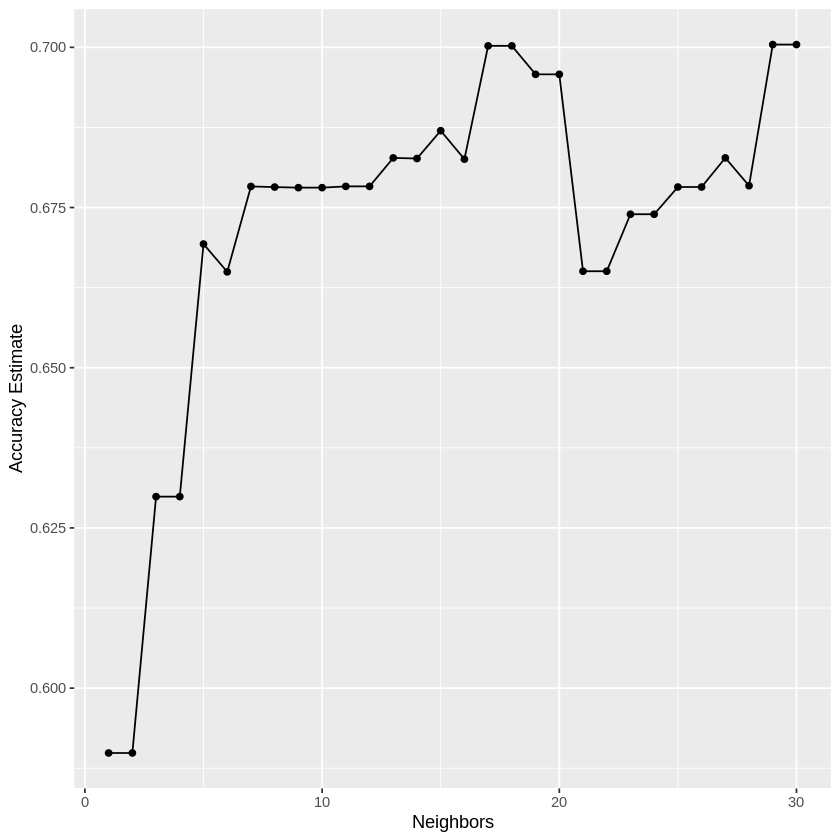

In [27]:
# Cross-Validation Dataset Splitting
heart_disease_cv <- vfold_cv(data = heart_disease_training, v = 5, strata = diagnosis)

# Recipe to Pre-process Dataset
heart_disease_recipe <- recipe(diagnosis ~ age + thalach, data = heart_disease_training) |>
                        step_center(all_predictors()) |>
                        step_scale(all_predictors()) 

# Classification Model for Finding the Best K Value
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Workflow and Plot for Finding the Best K Value
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() |>
       add_recipe(heart_disease_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_disease_cv, grid = k_vals) |>
       collect_metrics() |>
       filter(.metric == "accuracy")

accuracy_versus_k_plot <- ggplot(knn_results, aes(x = neighbors, y = mean))+
                          geom_point() +
                          geom_line() +
                          labs(x = "Neighbors", y = "Accuracy Estimate") 

accuracy_versus_k_plot

# Based on the plot, we can conclude that K = 18 gives us the highest accuracy

### Tuning Classification Model With Best K value

We tuned our classification model using our best K value, `neighbors = 18`. We used `workflow()` to combine `heart_disease_recipe` and our tuned classification model (`heart_disease_model`) together, and to fit the workflow onto our training set (`heart_disease_training`). Our last step was to make a prediction using the `predict()` function for our classification model against the test set (`heart_disease_testing`) using `bind_cols()`. We used the `metrics()` function to calculate the accuracy of our final classification model. Table 3 shows that the accuracy of our model is 74%. To further determine the accuracy of our classification model, we created a confusion matrix to see the amount of “Positive” and “Negative” predictions correctly made against the testing set and the amount of predictions that were false using `conf_mat()`. There were 12 points that were incorrectly labelled as “Positive” and 8 points as “Negative.”

In [28]:
# Setup Classification Model
heart_disease_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 18) |>
            set_engine("kknn") |>
            set_mode("classification")

# Setup Workflow for Classification
heart_disease_workflow <- workflow() |>
       add_recipe(heart_disease_recipe) |>
       add_model(heart_disease_model) |>
       fit(data = heart_disease_training) 


# Use Classification Model to Predict Testing Dataset, and Evaluate the Accuracy of the Classification Model
heart_disease_prediction <- predict(heart_disease_workflow, heart_disease_testing) |>
                            bind_cols(heart_disease_testing)

# To store the metrics
metrics <- heart_disease_prediction |>
            metrics(truth = diagnosis, estimate = .pred_class) 

# Confusion Matrix
confusion_matrix <- heart_disease_prediction |>
                    conf_mat(truth = diagnosis, estimate = .pred_class)


### Accuracy and Prediction Results

*Figure 7: Accuracy of Classification Model*

In [41]:
metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7368421
kap,binary,0.4659171


*Figure 8: Confusion Matrix of Classification Model*

In [42]:
confusion_matrix

          Truth
Prediction Negative Positive
  Negative       33       12
  Positive        8       23

### Discussion

According to our hypothesis that the relationship between age and maximum heart rate achieved can be used to determine the presence or absence of heart disease, the KNN classification model using these two variables as predictors was expected to have a fairly high accuracy on predicting the diagnosis of heart disease. If focusing on the relationship among the three variables involved, we expected to see people who exceed a certain age threshold and/or a certain low value of maximum heart rate to be more likely diagnosed with heart disease. Such expectations are reasonably established based on the research results that the prevalence of cardiovascular disease increases dramatically with increasing age, and the maximum heart rate of heart disease patients is usually significantly lower than the predicting values of healthy people (Han et al., 2022; Steenman & Lande, 2017). 

The outcomes of our analysis indeed support the predicted relationship of the three variables. From the visualisation of the training data (figure 1), it is obvious that the presence of heart disease increases as the age increases and/or the maximum heart rate decreases. More specifically, when the age exceeds 55 and/or the maximum heart rate achieved is lower than 150, the cases of the presence of heart disease start to account for a dominating amount in the overall cases compared to the cases of absence. Besides, the accuracy of our classification model is quite satisfying as well. In our training set, the majority class label “Negative” (absence of heart disease) makes up 54.9% of the data. Our optimal K (K = 18) is found to have an accuracy of 70.0%, and the final prediction of the testing data has an accuracy of 73.7%. Both accuracy values of our model are much higher than the majority classifier, meaning that the model itself is able to function relatively well on predicting the diagnosis. However, the accuracy of the model is still not as high as 90%-100%. The possible reason is that instead of having a distinct boundary, the groups of presence and absence of heart disease actually overlap with each other quite a lot, especially at the area where maximum heart rate > 150 (seen in figure 1). Since there are no other predictors used for assistance, it might sometimes be hard for the classifier to make an accurate judgement for observations that fall in those areas.

Findings of this analysis have confirmed both the positive correlation between the presence of heart disease and age, and the negative correlation between the presence of heart disease and maximum heart rate. With knowing the existence of these relationships, people can evaluate their health status accordingly and take heart disease screening as needed. It can also be used as a reference criteria for doctors and medical workers when trying to screen or even diagnose suspected heart diseases. Therefore, by increasing people’s awareness of the relevance between heart disease and age & maximum heart rate, our findings can possibly reduce the risk of people developing sudden heart diseases. The KNN classification model created in this study, as it has a relatively high accuracy at predicting the presence /absence of heart disease based on the two predictors mentioned, can act as a strong helper for such screening processes. On the other hand, there is still a large room for improvement for our classification model. Future research can continue on finding the best diagnosing factors for heart disease in order to build the most accurate model. Also, since stroke is related to cardiovascular problems and is thus often associated with heart diseases, another potential research question to solve is whether the risky factors of heart disease can also be used to predict a stroke, and how might we develop a model to help diagnosed heart disease patients to reduce the risk of having a stroke.


### References

Han, S. H., Choi, M. S., Kim, Y. M., Kim, D. M., Park, H. E., Hong, J. W., Kim, S. H., Shin, Y. B., & Lee, B. J. (2022). Is age-predicted maximal heart rate applicable in patients with heart or lung disease? Annals of Rehabilitation Medicine, 46(3), 133–141. https://doi.org/10.5535/arm.21181

Steenman, M., & Lande, G. (2017). Cardiac aging and heart disease in humans. Biophysical Reviews, 9(2), 131–137. https://doi.org/10.1007/s12551-017-0255-9

Aha, D. W. (2017). Heart Disease Data Set [Data set]. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease
